## Data preprocessing

In [107]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import math


listings = pd.read_csv('NYC_2019_cleaned.csv')
#listings.info()

In [108]:
pd.set_option('display.max_columns', None)
#listings

In [109]:
listings.describe()

,host_since,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,desc_pos,desc_neg,desc_neu,desc_compound,host_is_superhost,host_identity_verified,has_availability,instant_bookable,review_interval,Entire home/apt,Private room,Shared room,Hotel room,Brooklyn,Manhattan,Queens,Staten Island,Bronx
count,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,3.829800e+04,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.0,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000,38298.000000
mean,1630.992506,8.334874,40.727960,-73.949783,2.913834,1.140621,1.182438,1.574808,1.722520,142.558724,6.113191,5.772882e+04,6.010288,16.481879,28.492819,120.566322,31.345527,93.855397,9.617447,9.268682,9.743851,9.749856,9.571910,9.387801,1.453853,0.143426,0.019267,0.825165,0.276169,0.249569,0.499191,1.0,0.379106,575.935271,0.522873,0.447778,0.021594,0.007755,0.421719,0.419787,0.126273,0.008068,0.024153
std,870.774441,54.716664,0.055638,0.047998,1.904321,0.421113,0.747214,1.152658,0.781451,202.373934,17.924143,1.097436e+07,8.528763,19.635688,30.305098,132.944964,50.686115,8.623361,0.838878,1.084868,0.716656,0.724167,0.757007,0.922463,1.733232,0.076942,0.025139,0.119209,0.169022,0.432769,0.500006,0.0,0.485171,662.653397,0.499483,0.497272,0.145355,0.087721,0.493841,0.493530,0.332161,0.089462,0.153525
min,3.000000,0.000000,40.506410,-74.244420,1.000000,0.000000,0.000000,0.000000,0.076923,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000,0.000000,0.000000,0.000000,-0.871200,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,976.000000,1.000000,40.688170,-73.982188,2.000000,1.000000,1.000000,1.000000,1.153846,69.000000,1.000000,2.900000e+01,0.000000,0.000000,0.000000,0.000000,3.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.210000,0.094667,0.000000,0.792000,0.166678,0.000000,0.000000,1.0,0.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1632.000000,1.000000,40.721650,-73.954165,2.000000,1.000000,1.000000,1.000000,1.615385,101.000000,2.000000,3.650000e+02,1.000000,6.500000,18.000000,64.000000,11.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.790000,0.137345,0.011875,0.840429,0.265113,0.000000,0.000000,1.0,0.000000,335.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2279.750000,2.000000,40.763090,-73.932930,4.000000,1.000000,1.000000,2.000000,2.230769,170.000000,4.000000,1.125000e+03,10.000000,32.000000,54.000000,256.000000,36.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.190000,0.184473,0.028231,0.884437,0.372552,0.000000,1.000000,1.0,1.000000,875.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,4065.000000,1741.000000,40.913750,-73.707680,22.000000,15.500000,21.000000,40.000000,6.307692,10000.000000,1250.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,662.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,59.160000,1.000000,0.555000,1.000000,0.996900,1.000000,1.000000,1.0,1.000000,3867.000000,1.000000,1.000000,1.000000,1.

In [110]:
#Drop listing prices over $1000 and prices equal or less than $0 
listings = listings[listings['price']<=1000]
listings = listings[listings['price']>0]
listings['price'] = listings['price'].apply(lambda x:math.log(x))
listings.describe()

,host_since,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,desc_pos,desc_neg,desc_neu,desc_compound,host_is_superhost,host_identity_verified,has_availability,instant_bookable,review_interval,Entire home/apt,Private room,Shared room,Hotel room,Brooklyn,Manhattan,Queens,Staten Island,Bronx
count,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,3.817300e+04,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.00000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.0,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000,38173.000000
mean,1631.315249,8.351793,40.727956,-73.949714,2.898515,1.136222,1.176800,1.567155,1.720888,4.690669,6.089225,5.791522e+04,5.986797,16.432531,28.415189,120.224190,31.395646,93.856731,9.617871,9.268619,9.744112,9.750269,9.571634,9.38818,1.455108,0.143464,0.019285,0.825070,0.276106,0.249627,0.499044,1.0,0.379352,576.453593,0.521940,0.448746,0.021586,0.007728,0.422209,0.418856,0.126608,0.008095,0.024232
std,870.489071,54.804685,0.055676,0.048026,1.865014,0.402192,0.732292,1.119464,0.779978,0.642639,17.829528,1.099231e+07,8.509408,19.610678,30.271826,132.806848,50.740229,8.610193,0.837169,1.083412,0.714634,0.722179,0.755527,0.92107,1.734181,0.076970,0.025154,0.119326,0.168995,0.432803,0.500006,0.0,0.485232,662.974594,0.499525,0.497373,0.145329,0.087570,0.493918,0.493378,0.332537,0.089607,0.153770
min,3.000000,0.000000,40.506410,-74.244420,1.000000,0.000000,0.000000,0.000000,0.076923,2.302585,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,0.010000,0.000000,0.000000,0.000000,-0.871200,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,978.000000,1.000000,40.688130,-73.982120,2.000000,1.000000,1.000000,1.000000,1.153846,4.234107,1.000000,2.800000e+01,0.000000,0.000000,0.000000,0.000000,3.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.00000,0.210000,0.094714,0.000000,0.791933,0.166682,0.000000,0.000000,1.0,0.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1632.000000,1.000000,40.721580,-73.954110,2.000000,1.000000,1.000000,1.000000,1.615385,4.605170,2.000000,3.650000e+02,1.000000,6.000000,18.000000,63.000000,11.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,0.800000,0.137400,0.011895,0.840400,0.265088,0.000000,0.000000,1.0,0.000000,335.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2279.000000,2.000000,40.763110,-73.932860,4.000000,1.000000,1.000000,2.000000,2.230769,5.135798,4.000000,1.125000e+03,10.000000,32.000000,54.000000,256.000000,36.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,2.190000,0.184474,0.028235,0.884333,0.372521,0.000000,1.000000,1.0,1.000000,875.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,4065.000000,1741.000000,40.913750,-73.707680,16.000000,7.000000,21.000000,26.000000,6.307692,6.907755,1250.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,662.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,59.160000,1.000000,0.555000,1.000000,0.996900,1.000000,1.000000,1.0,1.000000,3867.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

## Interested in finding the factors that contribute to pricing

In [111]:
#Build a linear regression model

import scipy.stats as stats
import pylab
matplotlib.style.use('seaborn')

from sklearn.model_selection import train_test_split
x = listings.drop(columns='price')
y = listings['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [112]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [113]:
testing_predictions  = model.predict(x_test)
testing_predictions

array([4.68190449, 4.16889309, 3.87790643, ..., 5.03785168, 3.9362582 ,
       5.34325859])

In [114]:
model.coef_
coeff = pd.DataFrame(model.coef_, index=x.columns, columns=['coefficients'])
coeff

,coefficients
host_since,2.983821e-05
host_total_listings_count,1.352017e-04
latitude,-4.022695e-01
longitude,-3.073612e+00
accommodates,9.275112e-02
bathrooms,7.433025e-02
bedrooms,1.017594e-01
beds,-2.211625e-02
amenities,4.444010e-02
minimum_nights,-1.951832e-03


In [115]:
actual_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': testing_predictions})
actual_predicted['Difference%'] = (actual_predicted['Predicted']/actual_predicted['Actual']-1)*100
actual_predicted.set_index(np.arange(len(y_test)))


,Actual,Predicted,Difference%
0,4.844187,4.681904,-3.350048
1,4.262680,4.168893,-2.200184
2,3.555348,3.877906,9.072484
3,6.476972,5.954504,-8.066547
4,4.234107,4.487519,5.985037
...,...,...,...
7630,5.347108,4.684209,-12.397321
7631,4.859812,4.763513,-1.981545
7632,4.867534,5.037852,3.499045
7633,4.174387,3.936258,-5.704527


In [116]:
actual_predicted.describe()

,Actual,Predicted,Difference%
count,7635.000000,7635.000000,7635.000000
mean,4.690527,4.699598,0.837118
std,0.639920,0.737988,13.530414
min,2.302585,3.097246,-39.281480
25%,4.234107,4.255281,-4.309985
50%,4.624973,4.679357,0.408882
75%,5.108967,5.091076,5.380002
max,6.907755,50.342677,934.254159


## Evaluate the model by comparing the % difference from the actual price 

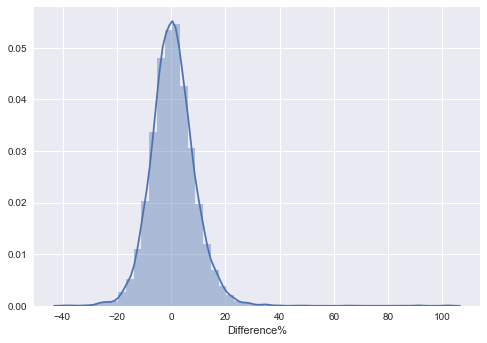

In [117]:
#plot the percentage difference
import seaborn as sns

sns.distplot(actual_predicted['Difference%'][actual_predicted['Difference%']<500])


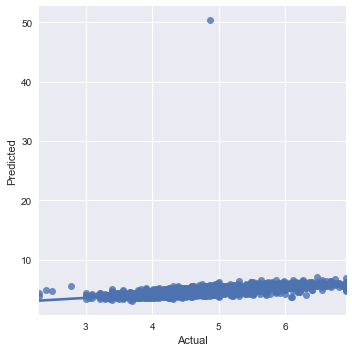

In [118]:
sns.lmplot('Actual', 'Predicted', actual_predicted)


In [119]:
#R-squared for each of the numerical variables

from sklearn.metrics import mean_squared_error as mse

r2_train = model.score(x_train, y_train)
r2_test = model.score(x_test, y_test)
mse_train = mse(y_train, model.predict(x_train))
mse_test = mse(y_test, model.predict(x_test))
print('R-squared for training data:\t\t%f'%(r2_train))
print('R-squared for testing data:\t\t%f'%(r2_test))
print('Training mse for training data:\t\t%f'%(mse_train))
print('Testing mse for testing data:\t\t%f'%(mse_test))

R-squared for training data:		0.666636
R-squared for testing data:		-0.006292
Training mse for training data:		0.137965
Testing mse for testing data:		0.412020


## Heat Map

In [14]:
!pip install gmplot --upgrade

Requirement already up-to-date: gmplot in c:\users\beryl\anaconda3\lib\site-packages (1.4.1)

You should consider upgrading via the 'c:\users\beryl\anaconda3\python.exe -m pip install --upgrade pip' command.


In [15]:
import gmplot


In [16]:
gmap = gmplot.GoogleMapPlotter(40.7128, -74.0059, 10)
gmap.apikey=api_key

In [17]:
gmap.heatmap(listings['latitude'], listings['longitude'])

In [18]:
gmap.draw('listing_frequency.html')

In [19]:
from IPython.display import IFrame
IFrame("listing_frequency.html", width=990, height=500)

## Availability_90

Want to know whether the attributes can explain the occupation of listings.

In [120]:
#drop highly correlated columns 'availability_30' ,'availability_60' and 'availability_365'

from sklearn.model_selection import train_test_split
x = listings.drop(columns=['availability_90','availability_30','availability_60','availability_365'])
y = listings['availability_90']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [121]:
availability_model = linear_model.LinearRegression()
availability_model.fit(x_train,y_train)

LinearRegression()

In [122]:
testing_predictions  = availability_model.predict(x_test)
testing_predictions

array([22.32821511, 36.79915279, 35.54992402, ..., 44.15210395,
       41.78316029, 11.51262538])

In [123]:
from sklearn.metrics import mean_squared_error as mse


r2_train = availability_model.score(x_train, y_train)
r2_test = availability_model.score(x_test, y_test)
mse_train = mse(y_train, availability_model.predict(x_train))
mse_test = mse(y_test, availability_model.predict(x_test))
print('R-squared for training data:\t\t%f'%(r2_train))
print('R-squared for testing data:\t\t%f'%(r2_test))
print('Training mse for training data:\t\t%f'%(mse_train))
print('Testing mse for testing data:\t\t%f'%(mse_test))

R-squared for training data:		0.290865
R-squared for testing data:		0.286242
Training mse for training data:		650.198241
Testing mse for testing data:		652.530889


In [124]:
availability_model.coef_
coeff = pd.DataFrame(availability_model.coef_, index=x.columns, columns=['coefficients'])
coeff

,coefficients
host_since,-4.961335e-03
host_total_listings_count,4.226852e-02
latitude,-6.157430e+01
longitude,1.371185e+02
accommodates,8.842068e-01
bathrooms,-1.116745e+00
bedrooms,-2.534827e+00
beds,3.153664e-01
amenities,2.824568e+00
price,1.121225e+01


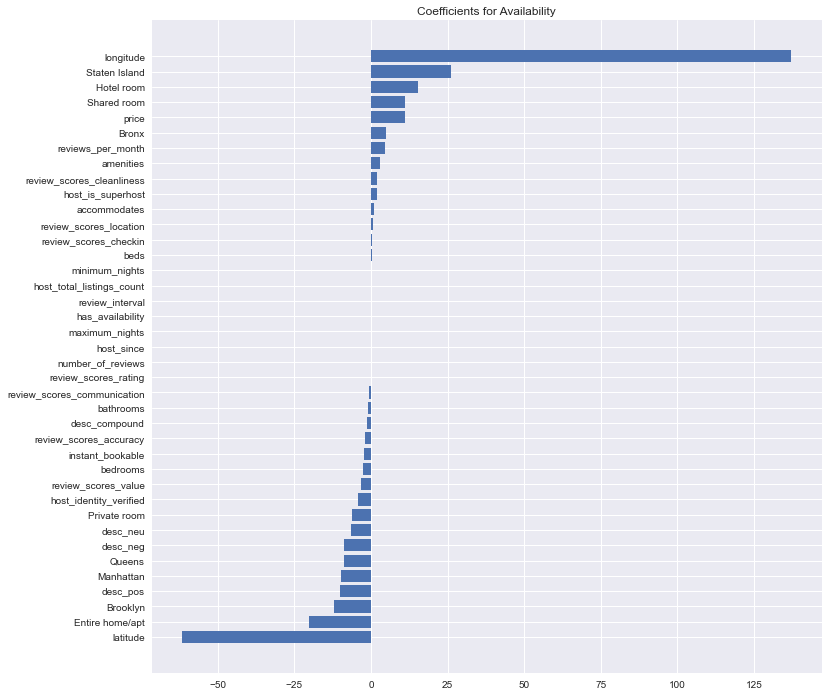

In [125]:
coeff = coeff.sort_values('coefficients',ascending=True)
#coeff
plt.figure(figsize=(12,12))
plt.title('Coefficients for Availability')
plt.barh(coeff.index, coeff['coefficients'])
plt.show()

### GBR Model

In [126]:
from sklearn import preprocessing
from sklearn import ensemble

In [149]:
from sklearn.ensemble import GradientBoostingRegressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 10,
          'learning_rate': 0.2,
          'criterion': 'mse'}

In [150]:
gbr_model = ensemble.GradientBoostingRegressor(**params)
gbr_model.fit(x_train, y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.2, max_depth=4,
                          min_samples_split=10, n_estimators=500)

In [151]:
p_train = gbr_model.predict(x_train)
p_test = gbr_model.predict(x_test)

In [152]:
from sklearn.metrics import r2_score
train_r_squared =(r2_score(y_train, p_train))
test_r_squared =(r2_score(y_test, p_test))
train_mse =(mse(y_train, p_train))
test_mse =(mse(y_test, p_test))
    
    
print('Training R-Square',train_r_squared)
print('Testing R-Square',test_r_squared)
print('Training mse',train_mse)
print('Testing mse',test_mse)

Training R-Square 0.6577710441518322
Testing R-Square 0.4402477600592929
Training mse 312.5394552935352
Testing mse 519.8669083873898


Text(0.5, 0, 'Relative Importance')

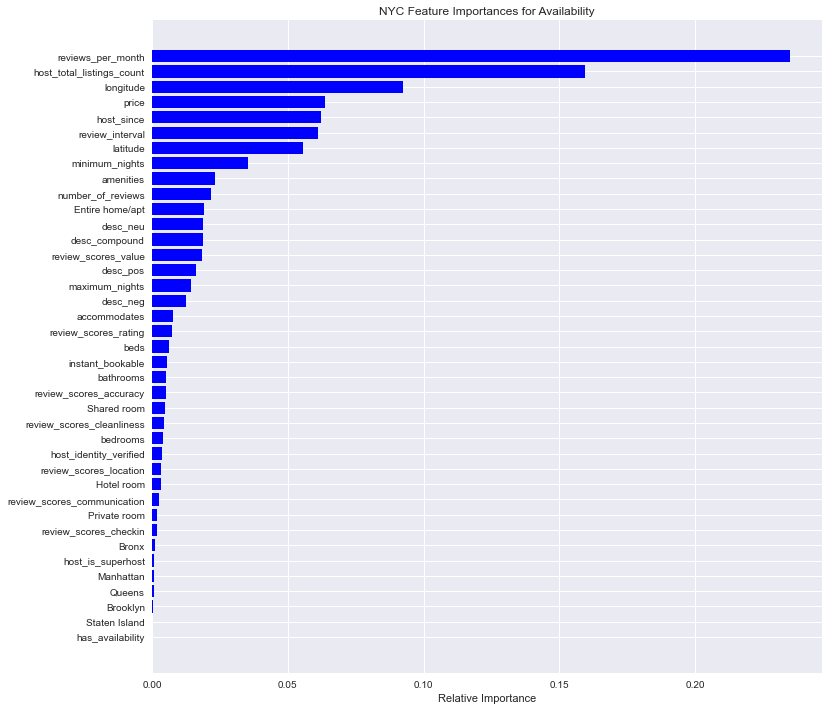

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_names = [key for key in x]
importances = gbr_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('NYC Feature Importances for Availability')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

Want to check if model will improve if only use the top 15 features.

In [132]:
top_15_features = list(np.array(feature_names)[indices])
new_indices = [x_train.columns.get_loc(x) for x in top_15_features]
new_indices

[6, 14, 5, 13, 7, 4, 11, 12, 8, 10, 2, 0, 9, 3, 1]

In [133]:
x_train_important = x_train.iloc[:, new_indices]
x_test_important = x_test.iloc[:,new_indices]

In [134]:
gbr_model = ensemble.GradientBoostingRegressor(**params)
gbr_model.fit(x_train_important, y_train)

GradientBoostingRegressor(criterion='mse', max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [135]:
p_train_important = gbr_model.predict(x_train_important)
p_test_important = gbr_model.predict(x_test_important)

In [136]:
from sklearn.metrics import r2_score
train_r_squared =(r2_score(y_train, p_train_important))
test_r_squared =(r2_score(y_test, p_test_important))
train_mse =(mse(y_train, p_train_important))
test_mse =(mse(y_test, p_test_important))
    
    
print('Training R-Square',train_r_squared)
print('Testing R-Square',test_r_squared)
print('Training mse',train_mse)
print('Testing mse',test_mse)

Training R-Square 0.49871454773250323
Testing R-Square 0.3574068517353166
Training mse 457.67032117718026
Testing mse 597.2177203027362


### KNN

In [137]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

k_range = range(1,30)
mse_list = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    mse_list.append(mean_squared_error(y_test, y_pred))

Text(0, 0.5, 'Testing MSE')

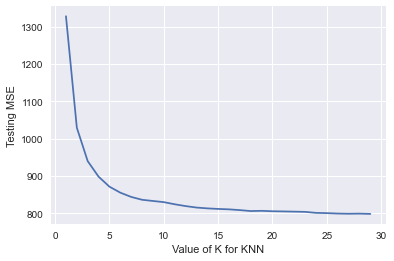

In [138]:
plt.plot(k_range, mse_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing MSE')

In [139]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_test, y_test)
y_pred = knn.predict(x_test)
print('MSE for k=5: ', math.sqrt(mean_squared_error(y_test, y_pred)))
knn_model.score(x_test, y_test)

MSE for k=5:  28.253226250420056


0.3446885200258759